Text(0, 0.5, 'Emission')

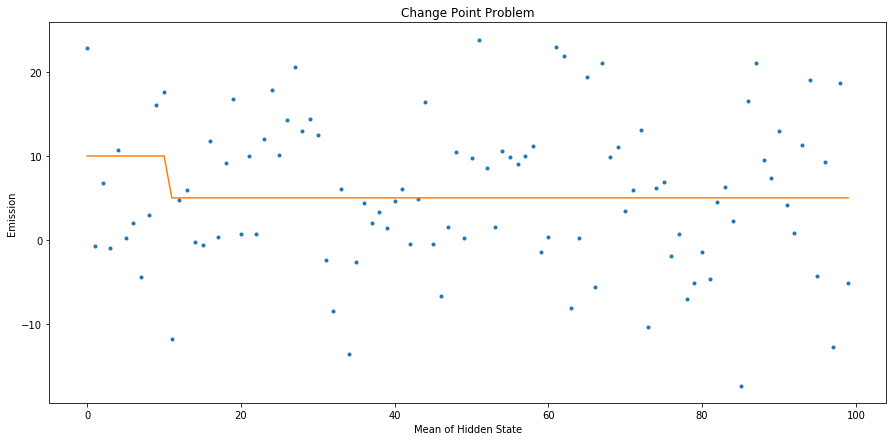

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


T = 100

PROBABILITY = {
    'state_1': {
        'start': 1.0, 
        'distribution': {'loc': 10, 'scale': 10},
        'transition': {
            'state_1': 0.95,
            'state_2': 0.05,
            
        }
    },
    'state_2': {
        'start': 0.0, 
        'distribution': {'loc': 5, 'scale': 10},
        'transition': {
            'state_2': 1.0,
            
        }
    }
}

def sample(probability = PROBABILITY):
    """Sample a new state."""
    return np.random.choice(
        a=list(probability),
        p=[
            probability[state]['transition'].get(new_state, 0.0)
            for new_state in PROBABILITY
        ],
    )

state = 'state_1'
Y = []
X = []
for i in range(T):
    Y.append(
        np.random.normal(
            **PROBABILITY[state]['distribution']
        )
    )
    X.append(state)
    state = sample()

Y = np.array(Y)
plt.figure(figsize = (15, 7))
plt.plot(Y, '.')
X_mu = list(map(lambda state: PROBABILITY[state]['distribution']['loc'], X))
plt.plot(X_mu)
plt.title("Change Point Problem")
plt.xlabel('Mean of Hidden State')
plt.ylabel('Emission')

In [11]:
PROBABILITY

{'state_1': {'start': 1.0,
  'distribution': {'loc': 10, 'scale': 10},
  'transition': {'state_1': 0.95, 'state_2': 0.05}},
 'state_2': {'start': 0.0,
  'distribution': {'loc': 5, 'scale': 10},
  'transition': {'state_2': 1.0}}}

In [22]:
def emission_probability(
    state, y,
    probability=PROBABILITY,
):
    """Probability of emission."""
    return stats.norm.pdf(y, **probability[state]['distribution'])

def most_likely(
    state, y, log_likelihood_path,
    probability=PROBABILITY
):
    new_log_likelihood = []
    for from_state in probability:
        if (
            probability[from_state]['transition'].get(state) and 
            from_state in log_likelihood_path
        ):
            new_log_likelihood.append(
                log_likelihood_path[from_state] +
                np.log(probability[from_state]['transition'][state]) +
                np.log(emission_probability(state, y))
            )    
    return max(new_log_likelihood)

def viterbi(
    Y, probability=PROBABILITY,
):
    # TODO: Might not be correct..
    log_likelihood_path = {
        state: np.log(probability[state]['start'])
        for state in probability if probability[state]['start'] != 0
    }
    
    yield log_likelihood_path
    
    for t, y in enumerate(Y):

        log_likelihood_path = {
            state: most_likely(state, y, log_likelihood_path)
            for state in probability
        }

        yield log_likelihood_path

list(viterbi(Y)) 

[{'state_1': 0.0},
 {'state_1': -4.101013929850706, 'state_2': -7.813957768852889},
 {'state_1': -7.950800727914943, 'state_2': -10.48313176752083},
 {'state_1': -11.275691301112488, 'state_2': -13.720369738245923},
 {'state_1': -15.145290624513292, 'state_2': -17.11742380945283},
 {'state_1': -18.4206624180146, 'state_2': -20.50224355165523},
 {'state_1': -22.1681371234466, 'state_2': -23.83626082976},
 {'state_1': -25.762742372667585, 'state_2': -27.103456636430142},
 {'state_1': -30.07159088207601, 'state_2': -30.7662787103417},
 {'state_1': -33.59292554766571, 'state_2': -34.008816361702884},
 {'state_1': -37.047339294584084, 'state_2': -37.83826456464189},
 {'state_1': -40.613723263761116, 'state_2': -41.861478619421916},
 {'state_1': -46.269026873622906, 'state_2': -46.49904798613266},
 {'state_1': -49.679872433509466, 'state_2': -49.7208944853262},
 {'state_1': -53.03658193711796, 'state_2': -52.94650275644143},
 {'state_1': -56.839247121008825, 'state_2': -56.30816683402395},
 